In [18]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [19]:
import pandas as pd
data=pd.read_csv("delivery_time.csv")

In [20]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA Transformations

In [21]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [22]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [35]:
data.shape

(21, 2)

In [36]:
data.isnull()

,delivery_time,sorting_time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [37]:
data.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

correlation

In [24]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<ipython-input-25-e431a7442d63>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

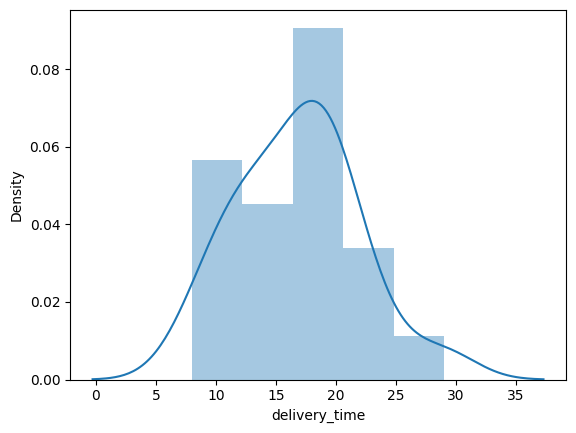

In [25]:
import seaborn as sns
sns.distplot(data['delivery_time'])

<ipython-input-26-2b17bb6b1b9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

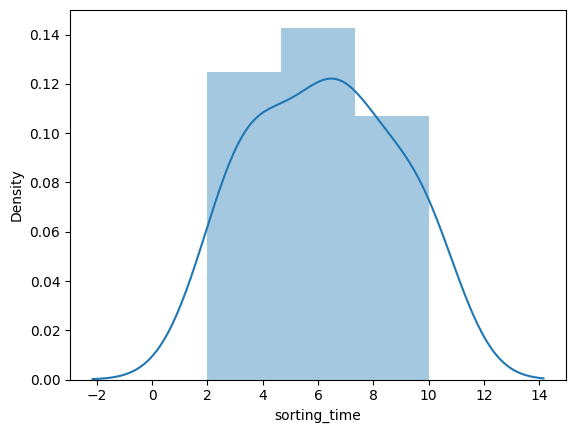

In [26]:
sns.distplot(data['sorting_time'])

<Axes: xlabel='delivery_time', ylabel='sorting_time'>

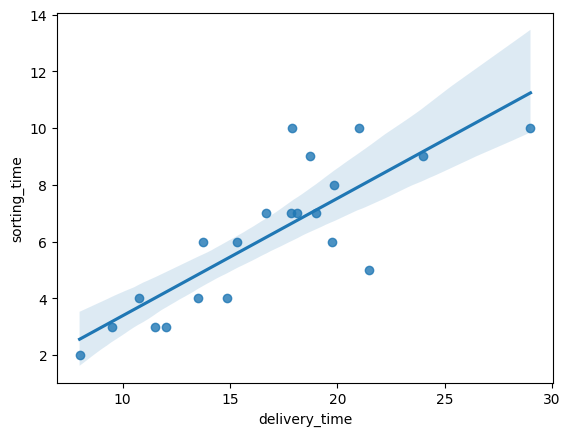

In [28]:
sns.regplot(x='delivery_time',y='sorting_time',data=data)

Fitting model

In [27]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

Teating model

In [29]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [30]:
#calculating t & p values
print(model.tvalues,'/n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 /n Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [31]:
#rsquared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

Hence here the rsquare value is so less so we are going to perform more transformations i.e,first one is log

In [39]:
import numpy as np
model1=smf.ols("delivery_time~np.log(sorting_time)",data=data).fit()

In [40]:
model1.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [41]:
print(model1.tvalues)

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64


In [42]:
(model1.rsquared)

0.6954434611324223

On applying logarithmic the rsquare  value has increased by a unit.Now let us apply sqrt

In [44]:
model2=smf.ols("delivery_time~np.sqrt(sorting_time)",data=data).fit()

In [45]:
model2.params

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64

In [46]:
print(model2.tvalues)

Intercept               -0.840911
np.sqrt(sorting_time)    6.592434
dtype: float64


In [47]:
(model2.rsquared)

0.695806227630867

In [49]:
model3=smf.ols("delivery_time~np.exp(sorting_time)",data=data).fit()

In [50]:
model3.params

Intercept               15.083578
np.exp(sorting_time)     0.000393
dtype: float64

In [51]:
print(model3.tvalues)

Intercept               14.406456
np.exp(sorting_time)     3.277108
dtype: float64


In [52]:
(model3.rsquared)

0.3611177022709089

Hence after performing some linear transformations like log.sqrt,exp we say among all these higher rsuare value is having on applying sqrt transformation so we conclude as it is the best model

Predicting data points

In [32]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [33]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [34]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64